In [1]:
from google.colab import drive
drive.mount("mnt")

Drive already mounted at mnt; to attempt to forcibly remount, call drive.mount("mnt", force_remount=True).


In [2]:
%cd "mnt/My Drive/LSTM"

/content/mnt/My Drive/LSTM


In [3]:
import numpy as np
from numpy import sin, cos
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [4]:
def gen_array(dataset):
    X, Y = [], []
    for i in range(np.size(dataset) - 2):
        X.append(dataset[i])
        Y.append(dataset[i+1])
    return np.array(X), np.array(Y)

In [5]:
angle1 = 120
angle2 = 0
G = 9.81  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg

def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

dt = 0.01
t = np.arange(0.0, 100 , dt)
state = np.radians([angle1, 0, angle2, 0])
y = integrate.odeint(derivs, state, t)
x1 = 1 * sin(y[:, 0])
y1 = -1 * cos(y[:, 0])
x2 = 1 * sin(y[:, 2]) + x1
y2 = -1 * cos(y[:, 2]) + y1

In [6]:
data = np.transpose([y2]).astype('float32')
# normalize
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
# lookback
trainX, trainY = gen_array(data)
# reshape
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [7]:
model = Sequential()
model.add(LSTM(8, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.keras.metrics.MeanSquaredError()])
history = model.fit(trainX, trainY, validation_split=0.33, epochs=50, batch_size=1, verbose=2, validation_steps=30)

Epoch 1/50
6698/6698 - 24s - loss: 0.0068 - mean_squared_error: 0.0277 - val_loss: 2.2672e-04 - val_mean_squared_error: 0.0067
Epoch 2/50
6698/6698 - 7s - loss: 1.7632e-04 - mean_squared_error: 0.0047 - val_loss: 4.9753e-04 - val_mean_squared_error: 0.0035
Epoch 3/50
6698/6698 - 7s - loss: 1.7616e-04 - mean_squared_error: 0.0028 - val_loss: 3.1957e-04 - val_mean_squared_error: 0.0024
Epoch 4/50
6698/6698 - 7s - loss: 1.7539e-04 - mean_squared_error: 0.0021 - val_loss: 2.3129e-04 - val_mean_squared_error: 0.0018
Epoch 5/50
6698/6698 - 7s - loss: 1.7603e-04 - mean_squared_error: 0.0016 - val_loss: 4.8169e-04 - val_mean_squared_error: 0.0015
Epoch 6/50
6698/6698 - 7s - loss: 1.7664e-04 - mean_squared_error: 0.0014 - val_loss: 3.5479e-04 - val_mean_squared_error: 0.0013
Epoch 7/50
6698/6698 - 7s - loss: 1.7510e-04 - mean_squared_error: 0.0012 - val_loss: 3.8710e-04 - val_mean_squared_error: 0.0011
Epoch 8/50
6698/6698 - 7s - loss: 1.7345e-04 - mean_squared_error: 0.0011 - val_loss: 4.5141e

In [8]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


In [9]:
acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

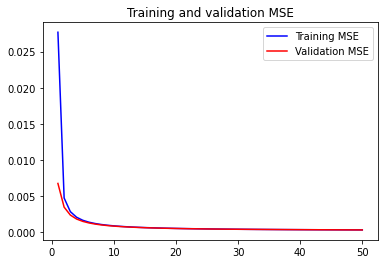

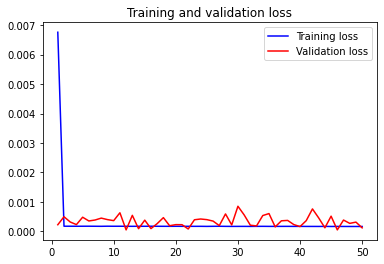

In [10]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validation MSE')
plt.title('Training and validation MSE')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
!mkdir -p saved_model_y
model.save("/content/mnt/My Drive/LSTM/saved_model_y") 

INFO:tensorflow:Assets written to: /content/mnt/My Drive/LSTM/saved_model_y/assets


INFO:tensorflow:Assets written to: /content/mnt/My Drive/LSTM/saved_model_y/assets


In [66]:
new_angle1=0.05
new_t = np.arange(0, 200 , dt)
new_state = np.radians([new_angle1, 0, angle2, 0])
new_y = integrate.odeint(derivs, new_state, new_t)
new_x1 = 1 * sin(new_y[:, 0])
new_y1 = -1 * cos(new_y[:, 0])
new_x2 = 1 * sin(new_y[:, 2]) + new_x1
new_y2 = -1 * cos(new_y[:, 2]) + new_y1

In [67]:
new_data = np.transpose([new_y2]).astype('float32')
# normalize
new_data = scaler.fit_transform(new_data)
# lookback
new_trainX, new_trainY = gen_array(new_data)
# reshape
new_trainX = np.reshape(new_trainX, (new_trainX.shape[0], 1, new_trainX.shape[1]))

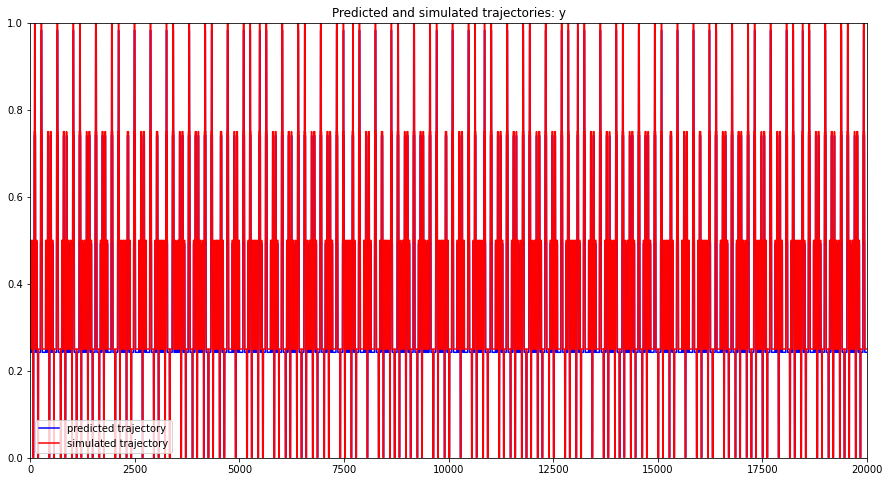

In [68]:
prediction = model.predict(new_trainX)

ax = plt.subplot(1,1,1)
ax.set_xlim(0,20000)
ax.set_ylim(0,1)
plt.plot(prediction, 'b', label='predicted trajectory')
plt.plot(new_trainY, 'r', label='simulated trajectory')
plt.title('Predicted and simulated trajectories: y')
plt.legend()

fig = ax.figure
fig.set_figwidth(15)
fig.set_figheight(8)
plt.show()

In [69]:
np.savetxt('predictionY0.txt', prediction)

In [70]:
np.savetxt('newtrainY0.txt', new_trainY)